### Good material
https://onlinestatbook.com/2/sampling_distributions/samplingdist_diff_means.html

In [1]:
import numpy as np
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product
import scipy.stats as stats
import matplotlib.patches as mpatches
from scipy.stats import norm, t, ttest_1samp
from math import ceil
from IPython.display import HTML
from matplotlib.ticker import FormatStrFormatter
from collections import Counter

def print_color(text, color="black", font_weight="normal", font_style="normal", font_size="small"): 
    display(HTML(f'<span style="color: {color};font-weight: {font_weight}; font-style: {font_style}; font-size: {font_size};">{text}</span>'))

### Create theoretical population

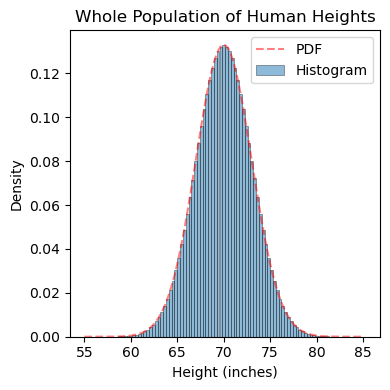

In [2]:
lowest_height_whole_pop= 55
highest_height_whole_pop = 85
mean_height_whole_pop = 70
std_height_whole_pop = 3
num_bars_whole_pop = 100
n_points_x_axis = 1000

def normal_distribution(x, mu, sigma):
    pdf_values = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return pdf_values

def create_whole_population(f_normal_distribution, lowest_height, highest_height, mean_height, std_height, n_points):
    x_values = np.linspace(lowest_height, highest_height, n_points)
    pdf_curve = [f_normal_distribution(x, mean_height, std_height) for x in x_values]
    return pd.DataFrame({'Height': x_values, 'Density': pdf_curve})

def plot_whole_population(df, num_bins, lowest_height, highest_height):
    fig, ax = plt.subplots(figsize=(4, 4))
    bin_width = (highest_height - lowest_height) / num_bins
    mid_x_values = np.linspace(lowest_height, highest_height, num_bins) + bin_width / 2
    pdf_values = [df['Density'].iloc[np.argmin(np.abs(df['Height'] - x))] for x in mid_x_values]
    ax.plot(df['Height'], df['Density'], label='PDF', color='red', linestyle='dashed', alpha=0.5, linewidth=1.5)
    ax.bar(mid_x_values, pdf_values, width=bin_width, alpha=0.5, edgecolor='black', linewidth=0.5, label='Histogram')
    ax.set_title('Whole Population of Human Heights')
    ax.set_xlabel('Height (inches)')
    ax.set_ylabel('Density')
    ax.legend()
    plt.tight_layout()
    plt.show()

# Create whole population
df_whole_pop = create_whole_population(normal_distribution, lowest_height_whole_pop, highest_height_whole_pop, 
                                       mean_height_whole_pop, std_height_whole_pop, n_points_x_axis)

# Plot whole population with histogram bars
plot_whole_population(df_whole_pop, num_bars_whole_pop, lowest_height_whole_pop, highest_height_whole_pop)

### Create mini roughly-normal population 01

,Height,Count,Probability
0,63.33,1,0.0625
1,66.67,4,0.2500
2,70.00,6,0.3750
3,73.33,4,0.2500
4,76.67,1,0.0625


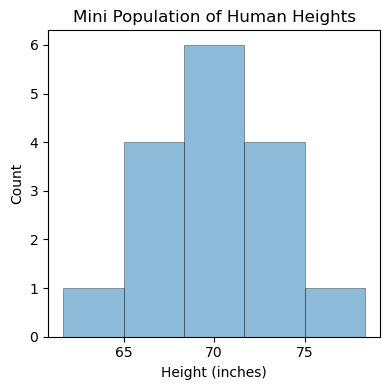

Unique elements: [63.33 66.67 70.   73.33 76.67]
Total count of elements: 16
Mean: 70.0
Std: 3.33


In [3]:
lowest_height_mini_pop_01= 55
mean_height_mini_pop_01 = 70
highest_height_mini_pop_01 = 85
std_height_mini_pop_01 = 3
num_bars_mini_pop_01 = 100
# approx_num_bars_mini_pop_01=9
# approx_total_count_mini_pop_01=30
approx_num_bars_mini_pop_01=9
approx_total_count_mini_pop_01=15

def create_mini_population(f_normal_distribution, start, end, n_bins, total_count, mean_height, std_height):
    bin_edges = np.linspace(start, end, n_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
    bin_centers = np.round(bin_centers, 2)  # Round bin_centers to two decimal places
    bin_width = (end - start) / n_bins
    densities = np.array([np.mean(f_normal_distribution(np.linspace(edge, bin_edges[i+1], 100), mean_height, std_height)) for i, edge in enumerate(bin_edges[:-1])])
    float_counts = densities * total_count / sum(densities)
    int_counts = np.round(float_counts).astype(int)
    non_zero_indices = int_counts != 0
    bin_centers = bin_centers[non_zero_indices]
    int_counts = int_counts[non_zero_indices]
    probabilities = int_counts / sum(int_counts)  # Calculate probabilities
    return pd.DataFrame({'Height': bin_centers, 'Count': int_counts, 'Probability': probabilities})

def plot_mini_population(df, ax, label):
    centers = df['Height']
    counts = df['Count']
    bin_width = centers.iloc[1] - centers.iloc[0]
    ax.bar(centers, counts, width=bin_width, alpha=0.5, edgecolor='black', linewidth=0.5, label=label)
    
def calculate_weighted_mean(df_col_value, df_col_count):
    weighted_mean = (df_col_value * df_col_count).sum() / df_col_count.sum()
    return weighted_mean

def calculate_weighted_std(df_col_value, df_col_count):
    weighted_mean = (df_col_value * df_col_count).sum() / df_col_count.sum()
    squared_deviations = ((df_col_value - weighted_mean) ** 2) * df_col_count
    weighted_variance = squared_deviations.sum() / df_col_count.sum()
    weighted_std = np.sqrt(weighted_variance)
    return weighted_std


# Create mini (discretized) population
df_mini_pop_01 = create_mini_population(normal_distribution, lowest_height_mini_pop_01, highest_height_mini_pop_01, 
                                        approx_num_bars_mini_pop_01, approx_total_count_mini_pop_01, mean_height_mini_pop_01, std_height_mini_pop_01)

# Display mini population
display(df_mini_pop_01)

# Plot mini population
fig, ax = plt.subplots(figsize=(4, 4))
plot_mini_population(df_mini_pop_01, ax, "Population 1")
ax.set_title('Mini Population of Human Heights')
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

# Summary
mean_mini_pop_01 = calculate_weighted_mean(df_mini_pop_01['Height'], df_mini_pop_01['Count'])
std_mini_pop_01 = calculate_weighted_std(df_mini_pop_01['Height'], df_mini_pop_01['Count'])

print(f"Unique elements: {df_mini_pop_01['Height'].unique()}")
print(f"Total count of elements: {df_mini_pop_01['Count'].sum()}")
print(f"Mean: {mean_mini_pop_01}")
print(f"Std: {std_mini_pop_01:.2f}")

### Create mini roughly-normal population 02

Mini pop 01


,Height,Count,Probability
0,63.33,1,0.0625
1,66.67,4,0.2500
2,70.00,6,0.3750
3,73.33,4,0.2500
4,76.67,1,0.0625


Total count of elements: 16
Mean: 70.0
Std: 3.33

Mini pop 02


,Height,Count,Probability
0,83.33,1,0.0625
1,86.67,4,0.2500
2,90.00,6,0.3750
3,93.33,4,0.2500
4,96.67,1,0.0625


Total count of elements: 16
Mean: 90.0
Std: 3.33


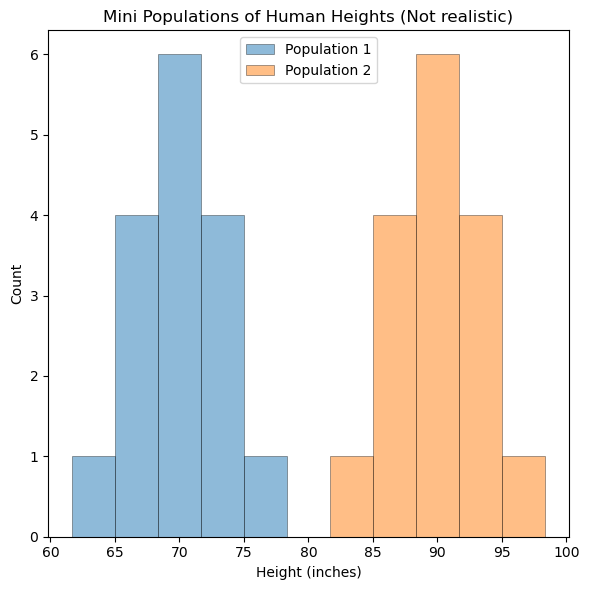

In [4]:
lowest_height_mini_pop_02= 75
mean_height_mini_pop_02 = 90
highest_height_mini_pop_02 = 105
std_height_mini_pop_02 = 3
num_bars_mini_pop_02 = 100
approx_num_bars_mini_pop_02=9
approx_total_count_mini_pop_02=15

def plot_two_mini_pops(df1, df2):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Plot the first mini population
    plot_mini_population(df1, ax, "Population 1")
    
    # Plot the second mini population
    plot_mini_population(df2, ax, "Population 2")
    
    ax.set_title('Mini Populations of Human Heights (Not realistic)')
    ax.set_xlabel('Height (inches)')
    ax.set_ylabel('Count')
    ax.legend()
    plt.tight_layout()
    plt.show()
    
# Create mini (discretized) population
df_mini_pop_02 = create_mini_population(normal_distribution, lowest_height_mini_pop_02, highest_height_mini_pop_02, 
                                        approx_num_bars_mini_pop_02, approx_total_count_mini_pop_02, mean_height_mini_pop_02, std_height_mini_pop_02)

# Summary
# Mini pop 01
mean_mini_pop_01 = calculate_weighted_mean(df_mini_pop_01['Height'], df_mini_pop_01['Count'])
std_mini_pop_01 = calculate_weighted_std(df_mini_pop_01['Height'], df_mini_pop_01['Count'])

print('Mini pop 01')
display(df_mini_pop_01)
#print(f"Unique elements: {df_mini_pop_01['Height'].unique()}")
print(f"Total count of elements: {df_mini_pop_01['Count'].sum()}")
print(f"Mean: {mean_mini_pop_01}")
print(f"Std: {std_mini_pop_01:.2f}")

print('')

# Mini pop 02
mean_mini_pop_02 = calculate_weighted_mean(df_mini_pop_02['Height'], df_mini_pop_02['Count'])
std_mini_pop_02 = calculate_weighted_std(df_mini_pop_02['Height'], df_mini_pop_02['Count'])

print('Mini pop 02')
display(df_mini_pop_02)
#print(f"Unique elements: {df_mini_pop_02['Height'].unique()}")
print(f"Total count of elements: {df_mini_pop_02['Count'].sum()}")
print(f"Mean: {mean_mini_pop_02}")
print(f"Std: {std_mini_pop_02:.2f}")

# Plot mini population
plot_two_mini_pops(df_mini_pop_01, df_mini_pop_02)

### SDSM of the mini population 02

,Mean_rectified,Count,Probability
0,63.3,1,9.536743e-07
1,64.0,5,1.907349e-05
2,64.7,15,1.811981e-04
3,65.3,35,1.087189e-03
4,66.0,70,4.620552e-03
5,66.7,121,1.478577e-02
6,67.3,185,3.696442e-02
7,68.0,255,7.392883e-02
8,68.7,320,1.201344e-01
9,69.3,365,1.601791e-01


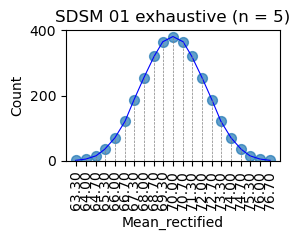

Mini pop mean: 70.00
Mini pop std: 3.33
SDSM sample size: 5
SDSM empirical SE: 1.49
SDSM theoretical SE (from mini pop std): 1.49


,Mean_rectified,Count,Probability
0,64.0,1,0.0001
1,64.7,1,0.0001
2,65.3,12,0.0012
3,66.0,38,0.0038
4,66.7,145,0.0145
5,67.3,352,0.0352
6,68.0,728,0.0728
7,68.7,1157,0.1157
8,69.3,1608,0.1608
9,70.0,1798,0.1798


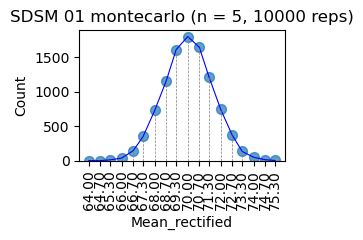

Mini pop mean: 70.00
Mini pop std: 3.33
SDSM sample size: 5
SDSM empirical SE: 1.48
SDSM theoretical SE (from mini pop std): 1.49


In [5]:
sample_size_mini_pop_01 = 5
decimal_places_rounding = 2
repetitions_montecarlo = 10000

def calculate_SDSM_exhaustive(df, sample_size): # We must take into account the probabilities!
    unique_heights = df['Height'].values
    unique_probabilities = df['Probability'].values
    # Generate all possible combinations
    all_combs = list(product(unique_heights, repeat=sample_size))
    # Calculate their probabilities and mean
    probabilities = []
    means = []
    for comb in all_combs:
        prob = np.prod([unique_probabilities[np.where(unique_heights == x)[0][0]] for x in comb])
        mean = np.mean(comb)
        probabilities.append(prob)
        means.append(mean)
    # Create df_combinations
    df_combinations = pd.DataFrame({
        'Combination': all_combs,
        'Mean': means,
        'Probability': probabilities
    })
    # Calculate empirical SE (
    empirical_SE = np.sqrt(np.sum([p * m**2 for p, m in zip(probabilities, means)]) - np.sum([p * m for p, m in zip(probabilities, means)])**2)
    return df_combinations, empirical_SE

def calculate_SDSM_montecarlo(df, sample_size, repetitions_montecarlo):
    # Extract the height and probability data
    heights = df['Height'].values
    probabilities = df['Probability'].values
    # Initialize an array to store the sample means
    sample_means = np.zeros(repetitions_montecarlo)
    # Generate sample means according to the given probabilities
    for i in range(repetitions_montecarlo):
        random_sample = np.random.choice(heights, size=sample_size, p=probabilities)
        sample_means[i] = np.mean(random_sample)
    # Calculate the empirical Standard Error (SE)
    empirical_SE = np.std(sample_means, ddof=1)
    # Create a df with the sample means
    df_combinations = pd.DataFrame({'Mean': sample_means})
    return df_combinations, empirical_SE 

def rectify_means(df, decimal_places=2):
    # Rectify the means by rounding
    df['Mean_rectified'] = df['Mean'].round(decimal_places)
    if 'Probability' in df.columns:
        # Group by the rectified mean and sum the probabilities
        grouped_df = df.groupby('Mean_rectified').agg(
            Count=pd.NamedAgg(column='Mean', aggfunc='size'),
            Probability=pd.NamedAgg(column='Probability', aggfunc='sum')
        ).reset_index()
        probabilities = grouped_df['Probability'].values
    else:
        # Group by the rectified mean and count the occurrences
        grouped_df = df.groupby('Mean_rectified').agg(
            Count=pd.NamedAgg(column='Mean', aggfunc='size')
        ).reset_index()
        # Create a Probability column based on the counts
        total_count = grouped_df['Count'].sum()
        grouped_df['Probability'] = grouped_df['Count'] / total_count
        probabilities = grouped_df['Probability'].values
    # Calculate the weighted mean of Mean_rectified
    mean_rectified_values = grouped_df['Mean_rectified'].values
    weighted_mean = np.sum(probabilities * mean_rectified_values)
    # Calculate the weighted standard deviation of Mean_rectified
    weighted_var = np.sum(probabilities * (mean_rectified_values - weighted_mean)**2)
    weighted_std = np.sqrt(weighted_var)
    return grouped_df, weighted_std

def plot_sdsm(df_grouped, sample_size, title, column_name='Mean_rectified'):
    # Since df_grouped is already grouped and contains counts, no need to group again
    mean_counts = df_grouped
    # Plotting
    fig, ax = plt.subplots(figsize=(3, 2.5))
    ax.scatter(mean_counts[column_name], mean_counts['Count'], alpha=0.7, s=50)
    ax.plot(mean_counts[column_name], mean_counts['Count'], color='blue', linewidth=0.8)
    for _, row in mean_counts.iterrows():
        ax.plot([row[column_name], row[column_name]], [0, row['Count']], linestyle='--', color='grey', linewidth=0.5)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_title(title)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    if len(mean_counts[column_name]) > 30:
        ax.set_xticks(np.linspace(mean_counts[column_name].min(), mean_counts[column_name].max(), 10))
    else:
        ax.set_xticks(mean_counts[column_name].values)
    ax.set_ylim(0,)
    if len(mean_counts[column_name]) > 4:
        ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    
def compare_empirical_estimated_SE(mean_pop, empirical_SE, pop_std, sample_size):
    theoretical_SE = pop_std / np.sqrt(sample_size)
    print(f"Mini pop mean: {mean_pop:.2f}")
    print(f"Mini pop std: {pop_std:.2f}")
    print(f"SDSM sample size: {sample_size}")
    print(f"SDSM empirical SE: {empirical_SE:.2f}")
    print(f"SDSM theoretical SE (from mini pop std): {theoretical_SE:.2f}")
    print_color(f"SDSM empirical SE / theoretical SE: {(empirical_SE/theoretical_SE) * 100:.2f}%", "black", "bold", "italic", "small")
    
print('')
print_color('SDSM mini pop 01 estimated by the exhaustive method:', "black", "bold", font_size="large")
df_sdsm_mini_pop_01_exhaustive, _ = calculate_SDSM_exhaustive(df_mini_pop_01, sample_size_mini_pop_01)
df_sdsm_mini_pop_01_exhaustive_rectified, SE_sdsm_mini_pop_01_exhaustive_rectified = rectify_means(df_sdsm_mini_pop_01_exhaustive, decimal_places=1)
display(df_sdsm_mini_pop_01_exhaustive_rectified)
plot_sdsm(df_sdsm_mini_pop_01_exhaustive_rectified, sample_size_mini_pop_01, f"SDSM 01 exhaustive (n = {sample_size_mini_pop_01})", column_name='Mean_rectified')
compare_empirical_estimated_SE(mean_mini_pop_01, SE_sdsm_mini_pop_01_exhaustive_rectified, std_mini_pop_01, sample_size_mini_pop_01)

print('')
print_color('SDSM mini pop 01 estimated by the monte carlo method:', "black", "bold", font_size="large")
df_sdsm_mini_pop_01_montecarlo, _ = calculate_SDSM_montecarlo(df_mini_pop_01, sample_size_mini_pop_01, repetitions_montecarlo)
df_sdsm_mini_pop_01_montecarlo_rectified, SE_sdsm_mini_pop_01_montecarlo_rectified = rectify_means(df_sdsm_mini_pop_01_montecarlo, decimal_places=1)
display(df_sdsm_mini_pop_01_montecarlo_rectified)
plot_sdsm(df_sdsm_mini_pop_01_montecarlo_rectified, sample_size_mini_pop_01, f"SDSM 01 montecarlo (n = {sample_size_mini_pop_01}, {repetitions_montecarlo} reps)", column_name='Mean_rectified')
compare_empirical_estimated_SE(mean_mini_pop_01, SE_sdsm_mini_pop_01_montecarlo_rectified, std_mini_pop_01, sample_size_mini_pop_01)

,Mean_rectified,Count,Probability
0,83.3,1,9.536743e-07
1,84.0,5,1.907349e-05
2,84.7,15,1.811981e-04
3,85.3,35,1.087189e-03
4,86.0,70,4.620552e-03
5,86.7,121,1.478577e-02
6,87.3,185,3.696442e-02
7,88.0,255,7.392883e-02
8,88.7,320,1.201344e-01
9,89.3,365,1.601791e-01


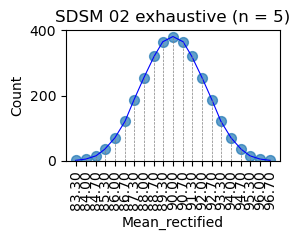

Mini pop mean: 90.00
Mini pop std: 3.33
SDSM sample size: 5
SDSM empirical SE: 1.49
SDSM theoretical SE (from mini pop std): 1.49


,Mean_rectified,Count,Probability
0,84.7,4,0.0004
1,85.3,14,0.0014
2,86.0,39,0.0039
3,86.7,158,0.0158
4,87.3,383,0.0383
5,88.0,705,0.0705
6,88.7,1223,0.1223
7,89.3,1635,0.1635
8,90.0,1758,0.1758
9,90.7,1601,0.1601


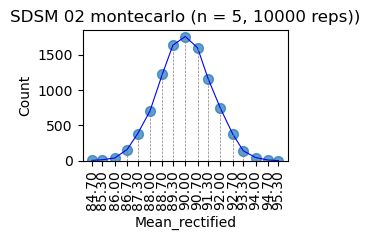

Mini pop mean: 90.00
Mini pop std: 3.33
SDSM sample size: 5
SDSM empirical SE: 1.49
SDSM theoretical SE (from mini pop std): 1.49


In [6]:
sample_size_mini_pop_02 = 5

print('')
print_color('SDSM mini pop 02 estimated by the exhaustive method:', "black", "bold", font_size="large")
df_sdsm_mini_pop_02_exhaustive, _ = calculate_SDSM_exhaustive(df_mini_pop_02, sample_size_mini_pop_02)
df_sdsm_mini_pop_02_exhaustive_rectified, SE_sdsm_mini_pop_02_exhaustive_rectified = rectify_means(df_sdsm_mini_pop_02_exhaustive, decimal_places=1)
display(df_sdsm_mini_pop_02_exhaustive_rectified)
plot_sdsm(df_sdsm_mini_pop_02_exhaustive_rectified, sample_size_mini_pop_02, f"SDSM 02 exhaustive (n = {sample_size_mini_pop_02})", column_name='Mean_rectified')
compare_empirical_estimated_SE(mean_mini_pop_02, SE_sdsm_mini_pop_02_exhaustive_rectified, std_mini_pop_02, sample_size_mini_pop_02)

print('')
print_color('SDSM mini pop 02 estimated by the monte carlo method:', "black", "bold", font_size="large")
df_sdsm_mini_pop_02_montecarlo, _ = calculate_SDSM_montecarlo(df_mini_pop_02, sample_size_mini_pop_02, repetitions_montecarlo)
df_sdsm_mini_pop_02_montecarlo_rectified, SE_sdsm_mini_pop_02_montecarlo_rectified = rectify_means(df_sdsm_mini_pop_02_montecarlo, decimal_places=1)
display(df_sdsm_mini_pop_02_montecarlo_rectified)
plot_sdsm(df_sdsm_mini_pop_02_montecarlo_rectified, sample_size_mini_pop_02, f"SDSM 02 montecarlo (n = {sample_size_mini_pop_02}, {repetitions_montecarlo} reps))", column_name='Mean_rectified')
compare_empirical_estimated_SE(mean_mini_pop_02, SE_sdsm_mini_pop_02_montecarlo_rectified, std_mini_pop_02, sample_size_mini_pop_02)

### Get samples of mini population 01 (taking into account the population PMF)

Mean: 70.0
Std: 3.33

Random sample 


,Height,Count
0,63.33,2
1,66.67,2
2,70.00,3
3,73.33,2
4,76.67,1


Sample size: 10
Mean: 69.333
Std: 4.16
Z-score: -0.20


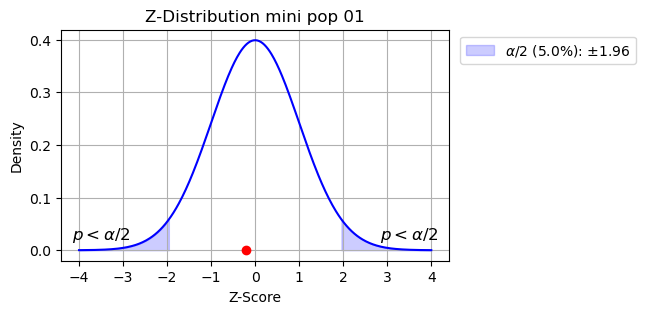


Extreme sample 


,Height,Count
0,76.67,10


Sample size: 10
Mean: 76.67
Std: 0.00
Z-score: 2.00


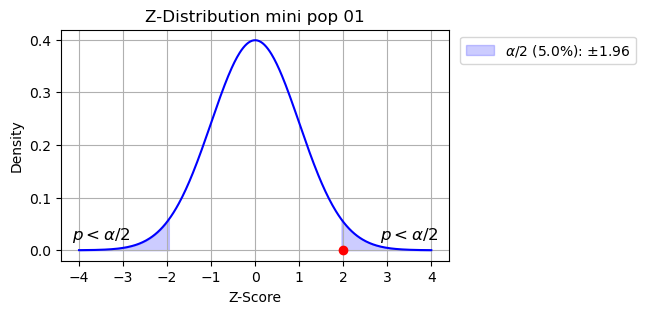

In [7]:
size_sample_mini_pop_01 = 10
alpha_mini_pop_01 = 0.05

def generate_random_sample(df_mini_pop, sample_size):
    normalized_probabilities = df_mini_pop['Probability'] / df_mini_pop['Probability'].sum()
    sampled_means = np.random.choice(df_mini_pop['Height'], size=sample_size, p=normalized_probabilities)
    unique_values, counts = np.unique(sampled_means, return_counts=True)
    sampled_df = pd.DataFrame({'Height': unique_values, 'Count': counts})
    return sampled_df

def calculate_sample_z_score(sample_mean, population_mean, population_std):
    sample_z_score = (sample_mean - population_mean) / population_std
    return sample_z_score

def plot_z_distribution(sample_z_score, alpha, title):
    x = np.linspace(-4, 4, 400)  # Range of z-scores
    plt.figure(figsize=(5, 3))
    plt.plot(x, stats.norm.pdf(x), color='blue', label='Z-Distribution')
    x_fill = np.linspace(-4, -abs(stats.norm.ppf(alpha/2)), 100)  # Area to shade above alpha/2 on the left tail
    plt.fill_between(x_fill, stats.norm.pdf(x_fill), color='blue', alpha=0.2)
    x_fill = np.linspace(abs(stats.norm.ppf(alpha/2)), 4, 100)  # Area to shade above alpha/2 on the right tail
    plt.fill_between(x_fill, stats.norm.pdf(x_fill), color='blue', alpha=0.2)
    plt.scatter(sample_z_score, 0, color='red', label=f'Sample Z-Score', zorder=5)
    # Add texts for p < alpha and p > alpha
    plt.text(-3.5, 0.02, r'$p < \alpha/2$', fontsize=12, ha='center', color='black')
    plt.text(3.5, 0.02, r'$p < \alpha/2$', fontsize=12, ha='center', color='black')
    plt.xlabel('Z-Score')
    plt.ylabel('Density')
    plt.title(title)
    alpha_x = abs(stats.norm.ppf(alpha/2))
    alpha_patch = mpatches.Patch(color='blue', alpha=0.2, label=f'$\\alpha$/2 ({alpha * 100}%): $\\pm${alpha_x:.2f}')
    plt.legend(handles=[alpha_patch], loc='upper right', bbox_to_anchor=(1.5, 1))
    plt.grid(True)
    plt.show()
    
def decision_z_distribution(mean_pop, mean_sample, sample_z_score, sample_size, alpha):
    df = sample_size - 1
    # Calculate the two-tailed p-value
    p_value = 2 * (1 - norm.cdf(abs(sample_z_score)))
    # print(f"Decision: Because z({df}) = {sample_z_score:.4f}, p = {p_value:.4f} < {alpha} (two-tailed z-test),", end=" ")
    print_color(f"Decision: z({df}) = {sample_z_score:.4f}, p = {p_value:.4f} < {alpha} (two-tailed z-test):", "black", "bold")
    if p_value < alpha:
         print_color(f"the null hypothesis can be rejected.\nThe sample mean (= {mean_sample}) is significantly different from the population mean (= {mean_pop}).", 'green', 'bold')
    else:
        print_color(f"the null hypothesis can NOT be rejected.\nThe sample mean (= {mean_sample}) is NOT significantly different from the population mean (= {mean_pop}).", 'red', 'bold')

print_color('Mini pop 01', "black", "bold", font_size="large")
print(f"Mean: {mean_mini_pop_01}")
print(f"Std: {std_mini_pop_01:.2f}")
# Random sample following the normal probabilites
df_random_sample_mini_pop_01 = generate_random_sample(df_mini_pop_01, size_sample_mini_pop_01)
mean_random_sample_mini_pop_01 = calculate_weighted_mean(df_random_sample_mini_pop_01['Height'], df_random_sample_mini_pop_01['Count']).round(4)
std_random_sample_mini_pop_01 = calculate_weighted_std(df_random_sample_mini_pop_01['Height'], df_random_sample_mini_pop_01['Count']).round(4)
z_score_random_sample_mini_pop_01 = calculate_sample_z_score(mean_random_sample_mini_pop_01, mean_mini_pop_01, std_mini_pop_01)
print("\nRandom sample ")
display(df_random_sample_mini_pop_01)
print(f"Sample size: {df_random_sample_mini_pop_01['Count'].sum()}")
print(f"Mean: {mean_random_sample_mini_pop_01}")
print(f"Std: {std_random_sample_mini_pop_01:.2f}")
print(f"Z-score: {z_score_random_sample_mini_pop_01:.2f}")
plot_z_distribution(z_score_random_sample_mini_pop_01, alpha_mini_pop_01, 'Z-Distribution mini pop 01')
decision_z_distribution(mean_mini_pop_01, mean_random_sample_mini_pop_01, z_score_random_sample_mini_pop_01, size_sample_mini_pop_01, alpha_mini_pop_01)
          
# Extreme sample
extreme_sample_mini_pop_01_dict = {'Height': [df_mini_pop_01['Height'].iloc[-1]], 'Count': [size_sample_mini_pop_01]}
df_extreme_sample_mini_pop_01 = pd.DataFrame(extreme_sample_mini_pop_01_dict)
mean_extreme_sample_mini_pop_01 = calculate_weighted_mean(df_extreme_sample_mini_pop_01['Height'], df_extreme_sample_mini_pop_01['Count']).round(4)
std_extreme_sample_mini_pop_01 = calculate_weighted_std(df_extreme_sample_mini_pop_01['Height'], df_extreme_sample_mini_pop_01['Count']).round(4)
z_score_extreme_sample_mini_pop_01 = calculate_sample_z_score(mean_extreme_sample_mini_pop_01, mean_mini_pop_01, std_mini_pop_01)
print("\nExtreme sample ")
display(df_extreme_sample_mini_pop_01)
print(f"Sample size: {df_extreme_sample_mini_pop_01['Count'].sum()}")
print(f"Mean: {mean_extreme_sample_mini_pop_01}")
print(f"Std: {std_extreme_sample_mini_pop_01:.2f}")
print(f"Z-score: {z_score_extreme_sample_mini_pop_01:.2f}")
plot_z_distribution(z_score_extreme_sample_mini_pop_01, alpha_mini_pop_01, 'Z-Distribution mini pop 01')
decision_z_distribution(mean_mini_pop_01, mean_extreme_sample_mini_pop_01, z_score_extreme_sample_mini_pop_01, size_sample_mini_pop_01, alpha_mini_pop_01)

### Get samples of mini population 02

Mini pop 02

Mean: 90.0
Std: 3.33

Random sample 


,Height,Count
0,83.33,1
1,86.67,2
2,90.00,4
3,93.33,2
4,96.67,1


Sample size: 10
Mean: 90.0
Std: 3.65
Z-score: 0.00


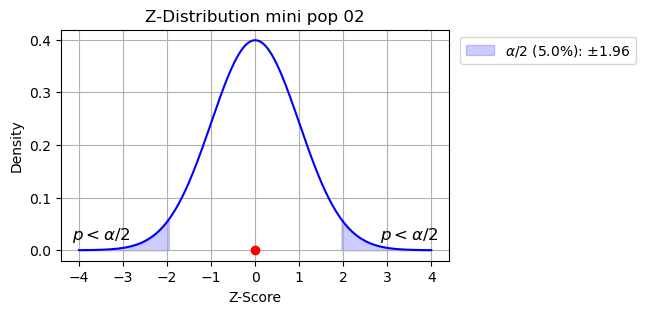


Extreme sample 


,Height,Count
0,96.67,10


Sample size: 10
Mean: 96.67
Std: 0.00
Z-score: 2.00


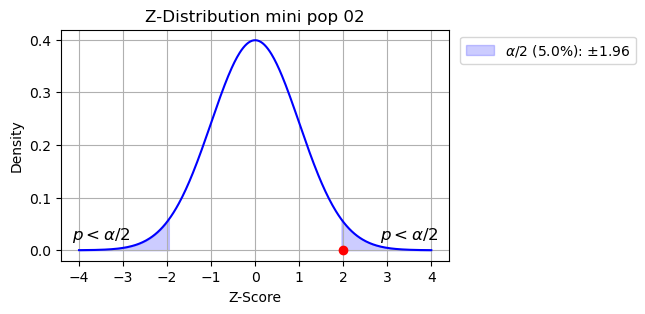

In [8]:
size_sample_mini_pop_02 = 10
alpha_mini_pop_02 = 0.05

# Random sample following the normal probabilites
df_random_sample_mini_pop_02 = generate_random_sample(df_mini_pop_02, size_sample_mini_pop_02)
mean_random_sample_mini_pop_02 = calculate_weighted_mean(df_random_sample_mini_pop_02['Height'], df_random_sample_mini_pop_02['Count']).round(4)
std_random_sample_mini_pop_02 = calculate_weighted_std(df_random_sample_mini_pop_02['Height'], df_random_sample_mini_pop_02['Count']).round(4)
z_score_random_sample_mini_pop_02 = calculate_sample_z_score(mean_random_sample_mini_pop_02, mean_mini_pop_02, std_mini_pop_02)
print("Mini pop 02\n")
print(f"Mean: {mean_mini_pop_02}")
print(f"Std: {std_mini_pop_02:.2f}")
print("\nRandom sample ")
display(df_random_sample_mini_pop_02)
print(f"Sample size: {df_random_sample_mini_pop_02['Count'].sum()}")
print(f"Mean: {mean_random_sample_mini_pop_02}")
print(f"Std: {std_random_sample_mini_pop_02:.2f}")
print(f"Z-score: {z_score_random_sample_mini_pop_02:.2f}")
plot_z_distribution(z_score_random_sample_mini_pop_02, alpha_mini_pop_02, 'Z-Distribution mini pop 02')
decision_z_distribution(mean_mini_pop_02, mean_random_sample_mini_pop_02, z_score_random_sample_mini_pop_02, size_sample_mini_pop_02, alpha_mini_pop_02)

# Extreme sample
extreme_sample_mini_pop_02_dict = {'Height': [df_mini_pop_02['Height'].iloc[-1]], 'Count': [size_sample_mini_pop_02]}
df_extreme_sample_mini_pop_02 = pd.DataFrame(extreme_sample_mini_pop_02_dict)
mean_extreme_sample_mini_pop_02 = calculate_weighted_mean(df_extreme_sample_mini_pop_02['Height'], df_extreme_sample_mini_pop_02['Count']).round(4)
std_extreme_sample_mini_pop_02 = calculate_weighted_std(df_extreme_sample_mini_pop_02['Height'], df_extreme_sample_mini_pop_02['Count']).round(4)
z_score_extreme_sample_mini_pop_02 = calculate_sample_z_score(mean_extreme_sample_mini_pop_02, mean_mini_pop_02, std_mini_pop_02)
print("\nExtreme sample ")
display(df_extreme_sample_mini_pop_02)
print(f"Sample size: {df_extreme_sample_mini_pop_02['Count'].sum()}")
print(f"Mean: {mean_extreme_sample_mini_pop_02}")
print(f"Std: {std_extreme_sample_mini_pop_02:.2f}")
print(f"Z-score: {z_score_extreme_sample_mini_pop_02:.2f}")
plot_z_distribution(z_score_extreme_sample_mini_pop_02, alpha_mini_pop_02, 'Z-Distribution mini pop 02')
decision_z_distribution(mean_mini_pop_02, mean_extreme_sample_mini_pop_02, z_score_extreme_sample_mini_pop_02, size_sample_mini_pop_02, alpha_mini_pop_02)

## One sample t-test

**Idea:** To check whether our sample is a common or a rare sample in the original population. <br> 

Our assumption is that the effect of a treatment would be exactly the same for every datapoint in our distribution. That means that the treatment could cause a shift in the mean of the population distribution (to the left of to the right) but it wouldn't change the variability (std) or shape of the curve (Gaussian). The same can be said about the SDMS (sampling distribution of sample means). So, we draw a sample and we check whether this sample would be a common or a rare sample in the original SDMS. If it is a common sample, we say that we don't have enough evidence to say that the treatment had any effect. However, if it is a rare sample, there are 2 possibilities: the treatment had no effect and we indeed got a rare sample (low probability); or we had an effect, meaning that we have a new population distribution and our sample belongs to that population. By convention, we choose the latter. <br> <br> 
To find whether our sample is common or rare, we find the probability of drawing samples with means exactly or bigger than our sample mean. To do that, we divide the tail beyond our sample mean by all the possibilities. To facilitate our calculations, we normalize our SDMS to the Z-distribution and then get the already calculated probability from there. 



#### Assumptions
1. **Normality**: The populations should be approximately normally distributed. For smaller sample sizes, this assumption is crucial, but as the sample size increases, thanks to the Central Limit Theorem, the $ t $-test becomes more robust to violations of this assumption.
2. **Random Sampling**
3. **Independence of Observations**
4. **Absence of Outliers**: The $ t $-test can be sensitive to outliers.
5. **Scale of Measurement**: the dependent variable should be measured measured on at least an interval scale. This means that there should be consistent intervals between scores on the measured outcome.

### Steps:

#### 1. State the Hypotheses:
- **Null Hypothesis ($ H_0 $):** Caffeine does not have an effect on reaction time, i.e., $ \mu = 400 $ msec.
- **Alternative Hypothesis ($ H_a $):** Caffeine has a significant effect on reaction time, i.e., $ \mu \neq 400 $ msec.

#### 2. Select the Test Statistic:
* If the population is known, we assume that the SDSM is a z-distribution
* If the population is not known and sample size >= 30, the SDSM follows either a t- or z-distribution
* If the population is not know and sample size < 30, the SDSM follows a t-distribution

#### 3. Choose whether the test is one- or two-tailed

#### 4. Choose the Level of Significance:
- E.g, $ \alpha = 0.05 $

#### 5. Determine the Critical Value and Locate the Critical Region
Use the t-distribution table:
- Find the appropriate column corresponding to your desired $\alpha$ and tailedness
- Find the appropriate degrees of freedom (df) row in the t-distribution table
- Annotate the t-score value of this intersection

#### 6. Compute the Test Statistic:
- **t-statistic**:
$$ t = \frac{M - \mu}{s_M} $$
Where $M$ is the sample mean, $\mu$ is the hypothesized population mean and $s^2$ is the sample variance

- **Estimated Standard Error ($s_M$)**:
$$ s_M = \sqrt{\frac{s^2}{n}} $$
Where $s^2$ is the sample variance and $n$ is the sample size.

- **Sample Variance ($s^2$)**:
$$ s^2 = \frac{SS}{df} $$
Where $df$ is the degrees of freedom, which is typically $n - 1$ for a sample variance, and SS is the Sum of Squared Deviations

- **Sum of Squared Deviations (SS)**:
$$ SS = \sum (X_i - \bar{X})^2 $$
Where $ X_i $ represents the $i^{th}$ individual data point in the sample and $ \bar{X} $ is the sample mean

#### 7. Make a Decision:
* Our sample (M = _ , SD = _ ) is/isn't significantly different (two-tailed t-test, t(degress of freedom) = t-value, p < or > alpha) than the population norm (M = _ ).

### Comparison z- and t-distributions

Degrees of freedom (df) = sample size (n) - 1

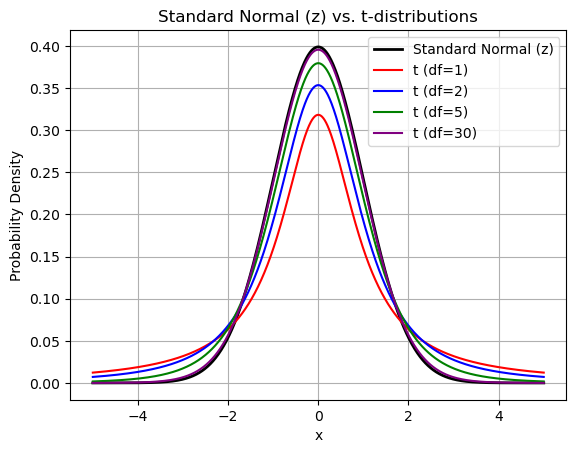

In [9]:
# Define x values
x = np.linspace(-5, 5, 1000)

# Standard normal (z-distribution) pdf
z_pdf = norm.pdf(x)

# Plot z-distribution
plt.plot(x, z_pdf, label='Standard Normal (z)', color='black', linewidth=2)

# Plot t-distributions for different degrees of freedom
dfs = [1, 2, 5, 30]  # Degrees of freedom
colors = ['red', 'blue', 'green', 'purple']

for df, color in zip(dfs, colors):
    t_pdf = t.pdf(x, df)
    plt.plot(x, t_pdf, label=f't (df={df})', color=color)

plt.title('Standard Normal (z) vs. t-distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

#### Estimation of standard errors when $\sigma$ is known vs unknown with an example

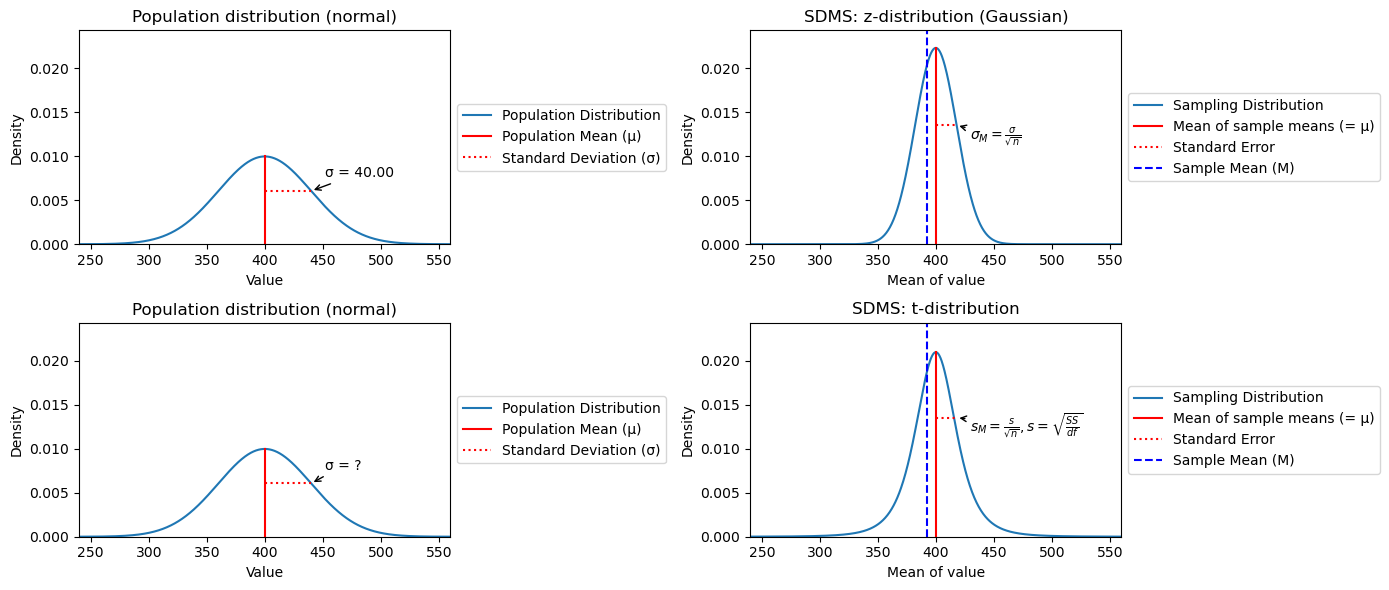

In [10]:
# Given values
mu = 400          # Population mean
sigma = 40        # Population standard deviation
sample_mean = 392 # Sample mean
n = 5             # Sample size
sample_std = sigma / np.sqrt(n)  # Standard error (std. deviation of sample means)
df = n - 1        # Degrees of freedom for t-distribution

# Generate data for plotting
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Now using a Gaussian for population distribution
y = norm.pdf(x, mu, sigma)

y_sample = norm.pdf(x, mu, sample_std)
y_tdist = t.pdf(x, df, mu, sample_std) # t-distribution

# Define the plots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

# Adjust xlim and ylim for all plots
xlims = (min(x), max(x))
ylims = (0, max(y_sample) + 0.002)

def plot_population_distribution(ax, title, sigma_text):
    ax.plot(x, y, label='Population Distribution')
    ax.plot([mu, mu], [0, norm.pdf(mu, mu, sigma)], 'red', label='Population Mean (μ)')
    
    # Adjusting the horizontal line for standard deviation
    height_at_sigma = norm.pdf(mu + sigma, mu, sigma)
    ax.hlines(y=height_at_sigma, xmin=mu, xmax=mu+sigma, color='red', linestyle=':', label='Standard Deviation (σ)')
    ax.annotate(sigma_text, xy=(mu + sigma, height_at_sigma), xytext=(10,10), textcoords='offset points', arrowprops=dict(arrowstyle="->"), fontsize=10)
    
    ax.set_title(title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")

def plot_sampling_distribution(ax, y_data, title, annotation):
    if y_data is y_sample:  # If it's a normal distribution
        height_at_mu = norm.pdf(mu, mu, sample_std)
    else:  # If it's a t-distribution
        height_at_mu = t.pdf(mu, df, mu, sample_std)

    ax.plot(x, y_data, label='Sampling Distribution')
    ax.plot([mu, mu], [0, height_at_mu], 'red', label='Mean of sample means (= μ)')
    ax.hlines(y=norm.pdf(mu + sample_std, mu, sample_std), xmin=mu, xmax=mu+sample_std, linestyle=':', color='red', label='Standard Error')
    ax.axvline(x=sample_mean, color='blue', linestyle='--', label='Sample Mean (M)')
    ax.annotate(annotation, xy=(mu + sample_std, norm.pdf(mu + sample_std, mu, sample_std)), xytext=(10,-10), textcoords='offset points', arrowprops=dict(arrowstyle="->"), fontsize=10)
    ax.set_title(title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.set_xlabel("Mean of value")
    ax.set_ylabel("Density")

    
# UPPER LEFT: Population Distribution (Gaussian)
plot_population_distribution(axes[0,0], 'Population distribution (normal)', f'σ = {sigma:.2f}')

# UPPER RIGHT: Sampling Distribution of the Sample Means (Normal Distribution)
plot_sampling_distribution(axes[0,1], y_sample, 'SDMS: z-distribution (Gaussian)', r'$\sigma_M = \frac{\sigma}{\sqrt{n}}$')

# LOWER LEFT: Population Distribution (Gaussian)
plot_population_distribution(axes[1,0], 'Population distribution (normal)', 'σ = ?')

# LOWER RIGHT: Sampling Distribution of the Sample Means (t-distribution)
plot_sampling_distribution(axes[1,1], y_tdist, 'SDMS: t-distribution', r'$s_M = \frac{s}{\sqrt{n}},  s = \sqrt{\frac{SS}{df}}$')

plt.tight_layout()
plt.show()

# Delete all variables of this block
del mu, sigma, sample_mean, n, sample_std, df, x, y, y_sample, y_tdist, fig, axes, xlims, ylims

#### T-distribution table

In [11]:
# Define the significance levels for one-tailed tests
alpha_values_one_tail = [0.25, 0.1, 0.05, 0.025, 0.01, 0.005]

# Convert them to two-tailed values (double the one-tail values)
alpha_values_two_tail = [alpha * 2 for alpha in alpha_values_one_tail]

# Define degrees of freedom range
df_range = list(range(1, 31))

# Populate the table
data = {}
for alpha_1, alpha_2 in zip(alpha_values_one_tail, alpha_values_two_tail):
    t_values = [t.ppf(1 - alpha_2/2, df) for df in df_range]  # Adjusted to take the correct percentile for two-tail alpha values
    data[(f'One-tail: α = {alpha_1}' if alpha_1 == 0.25 else f'α = {alpha_1}', 
         f'Two-tails: α = {alpha_2}' if alpha_2 == 0.5 else f'α = {alpha_2}')] = t_values

# Create dataframe
t_table = pd.DataFrame(data, index=df_range)
t_table.index.name = "Degrees of Freedom"
t_table.name = "T-Distribution Table"

display(t_table)

,One-tail: α = 0.25,α = 0.1,α = 0.05,α = 0.025,α = 0.01,α = 0.005
,Two-tails: α = 0.5,α = 0.2,α = 0.1,α = 0.05,α = 0.02,α = 0.01
Degrees of Freedom,,,,,,
1,1.000000,3.077684,6.313752,12.706205,31.820516,63.656741
2,0.816497,1.885618,2.919986,4.302653,6.964557,9.924843
3,0.764892,1.637744,2.353363,3.182446,4.540703,5.840909
4,0.740697,1.533206,2.131847,2.776445,3.746947,4.604095
5,0.726687,1.475884,2.015048,2.570582,3.364930,4.032143
6,0.717558,1.439756,1.943180,2.446912,3.142668,3.707428
7,0.711142,1.414924,1.894579,2.364624,2.997952,3.499483
8,0.706387,1.396815,1.859548,2.306004,2.896459,3.355387


### Continuing with our height example
#### Check for normality with the Shapiro-Wilk test
The Shapiro-Wilk test is best suited for small to moderate sample sizes (N < 50). For large sample sizes, the test can show statistical significance (i.e., reject the null hypothesis of normality) even for tiny deviations from normality, which might not be practically relevant.

In [12]:
def check_normality(df):
    # Convert the 'Count' column to integers
    df['Count'] = df['Count'].astype(int)
     # Create an empty list to store the expanded dataset
    expanded_data = []
    # Loop through each row in the dataframe
    for i, row in df.iterrows():
        height = row["Height"]
        count = int(row["Count"])  # Explicitly casting to int for safety
        # Add 'count' number of 'height' values to the expanded dataset
        expanded_data.extend([height] * count)
    # Convert the list to a NumPy array
    expanded_data_array = np.array(expanded_data)
    # Perform the Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(expanded_data_array)
    print(f"Shapiro-Wilk test statistic: {shapiro_stat}")
    print(f"P-value: {shapiro_p}")
    if shapiro_p > 0.05:
        print_color('Data follows a normal distribution', 'green', 'bold')
    else:
        print_color('Data does NOT follow a normal distribution', 'green', 'bold')
    # Return the test statistic and p-value
    return shapiro_stat, shapiro_p

# Execute the function
print('Mini pop 01:')
shapiro_stat, shapiro_p = check_normality(df_mini_pop_01)
print('\nMini pop 02:')
shapiro_stat, shapiro_p = check_normality(df_mini_pop_01)

Mini pop 01:
Shapiro-Wilk test statistic: 0.9320355653762817
P-value: 0.26253610849380493



Mini pop 02:
Shapiro-Wilk test statistic: 0.9320355653762817
P-value: 0.26253610849380493


#### T-test from the scratch

[63.33 63.33 66.67 66.67 70.   70.   70.   73.33 73.33 76.67]


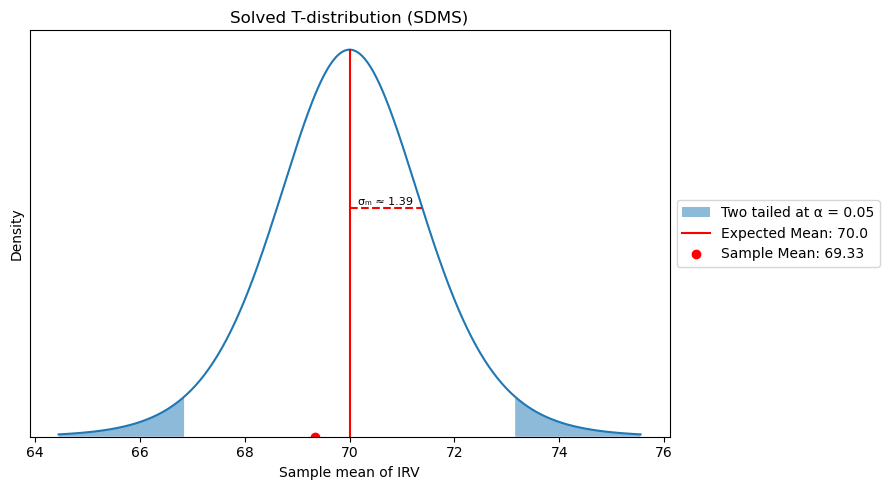

[76.67 76.67 76.67 76.67 76.67 76.67 76.67 76.67 76.67 76.67]


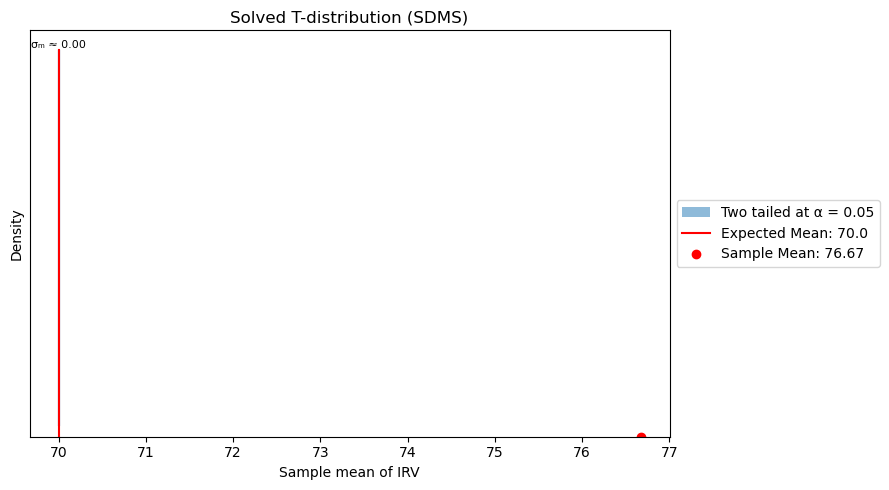

In [13]:
def reconstruct_sample(df):
    if "Height" in df.columns and "Count" in df.columns:
        heights = df["Height"].values
        counts = df["Count"].values
        sample = np.repeat(heights, counts)
        return sample
    else:
        raise ValueError("Input dataframe must have 'Height' and 'Count' columns")
        
def sum_squared_deviations(np_array):
    mean_val = np.mean(np_array)
    deviations = np_array - mean_val
    squared_deviations = deviations**2
    ss = np.sum(squared_deviations)
    return  ss

def sample_variance(degf, sum_squared_deviations):
    if degf <= 0:
        raise ValueError("Degrees of freedom must be greater than 0.")
    return sum_squared_deviations / degf

def estimated_standard_error(sample_var, n):
    if n <= 1:
        raise ValueError("Sample size must be greater than 1.")
    return np.sqrt(sample_var / n)

def t_score(sample_mean, expected_mean, estimated_standard_error):
    t = (sample_mean - expected_mean) / estimated_standard_error
    return t

def lookup_t_value(degf, alpha, test_type="two-tailed"):
    
    if degf not in t_table.index:
        raise ValueError(f"The degrees of freedom {degf} does not exist in the table.")
    
    if test_type == "two-tailed":
        if alpha not in [0.5, 0.2, 0.1, 0.05, 0.02, 0.01]:
            raise ValueError(f"The alpha value {alpha} does not exist in the table for a two-tailed t-test.")
    elif test_type == "one-tailed":
        if alpha not in [0.25, 0.1, 0.05, 0.025, 0.01, 0.005]:
            raise ValueError(f"The alpha value {alpha} does not exist in the table for a one-tailed t-test.")
    else:
        raise ValueError("test_type should be either 'one-tailed' or 'two-tailed'.")
    
    # Determine which level of the multi-index to look in based on test_type
    if test_type == "one-tailed":
        # Upper level for one-tail
        column_label = f'α = {alpha}'
        if column_label not in t_table.columns.get_level_values(0):
            column_label = 'One-tail: ' + column_label
        return t_table.xs(key=column_label, axis=1, level=0).loc[degf].values[0]
    elif test_type == "two-tailed":
        # Lower level for two-tails
        column_label = f'α = {alpha}'
        if column_label not in t_table.columns.get_level_values(1):
            column_label = 'Two-tails: ' + column_label
        return t_table.xs(key=column_label, axis=1, level=1).loc[degf].values[0]

def plot_results_ttest(data, expected_mean, t_stat, alpha=0.05):
    # Calculate the sample mean, standard deviation, and standard error
    sample_mean = np.mean(data)
    s = np.std(data, ddof=1)
    n = len(data)
    estimated_std = s / np.sqrt(n)
    # Degrees of freedom for t-distribution
    degf = n - 1
    # Create t-distribution curve
    x = np.linspace(expected_mean - 4*estimated_std, expected_mean + 4*estimated_std, 400)
    y = t.pdf(x, degf, loc=expected_mean, scale=estimated_std)
    # Maximum height of t-distribution
    y_max = max(y)
    # Calculate height of t-distribution curve at expected_mean + 1 estimated standard deviation
    y_intercept = t.pdf(expected_mean + estimated_std, degf, loc=expected_mean, scale=estimated_std)
    # Critical values for shading
    left_critical = expected_mean + t.ppf(alpha/2, degf)*estimated_std
    right_critical = expected_mean + t.ppf(1 - alpha/2, degf)*estimated_std
    # Create the plot
    plt.figure(figsize=(9, 5))
    # Plot t-distribution curve
    plt.plot(x, y)
    # Shade the tails
    plt.fill_between(x, y, where=(x < left_critical) | (x > right_critical), alpha=0.5, label=f'Two tailed at α = {alpha}')
    # Plot red vertical line from 0 to its intersection with t-distribution
    plt.plot([expected_mean, expected_mean], [0, y_max], color='red', label=f'Expected Mean: {expected_mean}')
    # Plot SE line
    plt.plot([expected_mean, expected_mean + estimated_std], [y_intercept, y_intercept], color='red', linestyle='--')
    # Add a quotation mark above the SE line
    SE_line_center_x = expected_mean + 0.5*estimated_std
    SE_line_center_y = y_intercept + 0.001
    plt.text(SE_line_center_x, SE_line_center_y, f'σ\u2098 ≈ {estimated_std:.2f}', ha='center', va='bottom', fontsize=8)
    # Plot red dot at sample mean
    plt.plot(sample_mean, 0, 'ro', label=f'Sample Mean: {sample_mean:.2f}')
    # Remove y-ticks
    plt.yticks([])
    # Title, labels, legend, and y limits
    plt.title('Solved T-distribution (SDMS)')
    plt.xlabel('Sample mean of IRV')
    plt.ylabel('Density')
    plt.ylim(0)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()
        
def decision_ttest(t_sample, degf, alpha, t_alpha, sample_mean, sample_std, expected_mean, test_type): 
    if abs(t_sample) >= t_alpha:  
         print_color(f"We reject H0. Our sample (M = {sample_mean:.2f}, SD = {sample_std:.2f}) is significantly different ({test_type} t-test, t({degf}) = {t_sample:.4f}, p < {alpha}) than the population norm (M = {expected_mean:.2f}).", "green", "bold")
    else:
         print_color(f"We accept H0. Our sample (M = {sample_mean:.2f}, SD = {sample_std:.2f}) is not significantly different ({test_type} t-test, t({degf}) = {t_sample:.4f}, p < {alpha}) than the population norm (M = {expected_mean:.2f}).", "red", "bold")

#[Optional]
def critical_values(t_alpha, expected_mean, estimated_standard_error):
    left_critical =  expected_mean - t_alpha * estimated_standard_error
    right_critical = expected_mean + t_alpha * estimated_standard_error
    return left_critical, right_critical
    
    
alpha = 0.05
test_type = "two-tailed"

# # Get an independent random sample with replacement (not taking into account the population PMF)
# size_sample_ttest_mini_pop_01 = 10
# sample_ttest_mini_pop_01 = df_mini_pop_01['Height'].sample(size_sample_ttest_mini_pop_01, replace=True)
# print(sample_ttest_mini_pop_01.tolist())

# Reconstruct samples

random_sample_ttest_mini_pop_01 = reconstruct_sample(df_random_sample_mini_pop_01)
extreme_sample_ttest_mini_pop_01 = reconstruct_sample(df_extreme_sample_mini_pop_01)

# Sum of squared deviations
sum_sq_dev_random_sample_mini_pop_01 = sum_squared_deviations(random_sample_ttest_mini_pop_01)
sum_sq_dev_extreme_sample_mini_pop_01 = sum_squared_deviations(extreme_sample_ttest_mini_pop_01)

# Sample Variance
degf_random_sample_mini_pop_01 = len(random_sample_ttest_mini_pop_01) - 1
sample_var_random_sample_mini_pop_01 = sample_variance(degf_random_sample_mini_pop_01, sum_sq_dev_random_sample_mini_pop_01)

degf_extreme_sample_mini_pop_01 = len(extreme_sample_ttest_mini_pop_01) - 1
sample_var_extreme_sample_mini_pop_01 = sample_variance(degf_extreme_sample_mini_pop_01, sum_sq_dev_extreme_sample_mini_pop_01)

# Estimated Standard Error
est_std_err_random_sample_mini_pop_01 = estimated_standard_error(sample_var_random_sample_mini_pop_01, len(random_sample_ttest_mini_pop_01))
est_std_err_extreme_sample_mini_pop_01 = estimated_standard_error(sample_var_extreme_sample_mini_pop_01, len(extreme_sample_ttest_mini_pop_01))

# t-statistic
mean_random_sample_ttest_mini_pop_01 = np.mean(random_sample_ttest_mini_pop_01)
t_random_sample_ttest_mini_pop_01 = t_score(mean_random_sample_ttest_mini_pop_01, mean_mini_pop_01, est_std_err_random_sample_mini_pop_01)

mean_extreme_sample_ttest_mini_pop_01 = np.mean(extreme_sample_ttest_mini_pop_01)
t_extreme_sample_ttest_mini_pop_01 = t_score(mean_extreme_sample_ttest_mini_pop_01, mean_mini_pop_01, est_std_err_extreme_sample_mini_pop_01)

# t value at the required alpha
t_alpha = lookup_t_value(degf_random_sample_mini_pop_01, alpha, test_type)

# [Optional]: Find the critical values
# left_critical, right_critical = critical_values(t_alpha, mean_mini_pop_01, est_std_err_random_sample_mini_pop_01)

# Result
print_color("Random sample mini pop 01", "black", "bold")
print(random_sample_ttest_mini_pop_01)
plot_results_ttest(random_sample_ttest_mini_pop_01, mean_mini_pop_01, t_random_sample_ttest_mini_pop_01, alpha)
decision_ttest(t_random_sample_ttest_mini_pop_01, degf_random_sample_mini_pop_01, alpha, t_alpha, mean_random_sample_ttest_mini_pop_01, est_std_err_random_sample_mini_pop_01, mean_mini_pop_01, test_type)
print("")
print_color("Extreme sample mini pop 01", "black", "bold")
print(extreme_sample_ttest_mini_pop_01)
plot_results_ttest(extreme_sample_ttest_mini_pop_01, mean_mini_pop_01, t_extreme_sample_ttest_mini_pop_01, alpha)
decision_ttest(t_extreme_sample_ttest_mini_pop_01, degf_extreme_sample_mini_pop_01, alpha, t_alpha, mean_extreme_sample_ttest_mini_pop_01, est_std_err_extreme_sample_mini_pop_01, mean_mini_pop_01, test_type)

#### Using scipy

In [14]:
alpha = 0.05

t_stat, p_value = ttest_1samp(random_sample_ttest_mini_pop_01, mean_mini_pop_01)
print(f"df = {degf_random_sample_mini_pop_01}\nt = {t_stat}\np = {p_value}")
print('')
if p_value < 0.05:
    print_color(f"RESULT: The p-value is {p_value:.4f}. This is less than {alpha}, so we reject H0. The average score of the class, {mean_random_sample_ttest_mini_pop_01}, is significantly different from the population mean {mean_mini_pop_01}.", "green", "bold")
else:
    print_color(f"RESULT: The p-value is {p_value:.4f}. This is more than {alpha}, so we DON'T reject H0. The average score of the class, {mean_random_sample_ttest_mini_pop_01}, is NOT significantly different from the populaiton mean {mean_mini_pop_01}.", "green", "bold")

df = 9
t = -0.48056910029642014
p = 0.642288889239051



## Independent samples t-test

#### Sampling distribution of the difference of sample means (SDDSM)

In [18]:
def calculate_difference_sdm(df_a, df_b):
    # Initialize an empty list to store the results
    results = []
    
    # Loop through all the rows in df_a and df_b to generate all possible combinations
    for index_a, row_a in df_a.iterrows():
        for index_b, row_b in df_b.iterrows():
            # Calculate the difference
            difference = row_a['Mean rectified'] - row_b['Mean rectified']
            
            # Calculate the probability of this difference occurring
            probability = row_a['Probability'] * row_b['Probability']
            
            # Append the results to the list
            results.append(((row_a['Mean rectified'], row_b['Mean rectified']), difference, probability))
    
    # Convert the list of results to a DataFrame
    df_difference = pd.DataFrame(results, columns=['Combination', 'Difference', 'Probability'])
    
    # Group by the 'Combination' and 'Difference' columns, summing up the probabilities for each unique difference
    df_final = df_difference.groupby(['Combination', 'Difference']).agg({'Probability': 'sum'}).reset_index()
    
    return df_final

# Example dataframes representing SDSMs for population A and B
data_a = {'Mean rectified': [2, 3, 4, 5, 6],
          'Probability': [0.0625, 0.25, 0.3125, 0.25, 0.0625]}
df_a = pd.DataFrame(data_a)

data_b = {'Mean rectified': [7, 8, 9, 10, 11],
          'Probability': [0.0625, 0.25, 0.3125, 0.25, 0.0625]}
df_b = pd.DataFrame(data_b)

# Calculate the SDSM for the difference between sample means of A and B
df_difference = calculate_difference_sdm(df_a, df_b)
display(df_difference)

,Combination,Difference,Probability
0,"(2.0, 7.0)",-5.0,0.003906
1,"(2.0, 8.0)",-6.0,0.015625
2,"(2.0, 9.0)",-7.0,0.019531
3,"(2.0, 10.0)",-8.0,0.015625
4,"(2.0, 11.0)",-9.0,0.003906
5,"(3.0, 7.0)",-4.0,0.015625
6,"(3.0, 8.0)",-5.0,0.062500
7,"(3.0, 9.0)",-6.0,0.078125
8,"(3.0, 10.0)",-7.0,0.062500
9,"(3.0, 11.0)",-8.0,0.015625
